In [1]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, LogisticRegression
from fast_ml.model_development import train_valid_test_split
import mlflow
import mlflow.sklearn
import logging
import matplotlib.pyplot as plt


import dvc.api


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:
from data_prep import Clean_df

In [5]:
df = pd.read_csv('../data/AdSmartABdata.csv')



In [6]:
clean_df = Clean_df()


In [7]:
df_clean = clean_df.pipeline(df)

In [8]:
df_clean

,platform_os,hour,device_make_Unknown,device_make_htc,device_make_huawei,device_make_iphone,device_make_lg,device_make_moto,device_make_nokia,device_make_oneplus,device_make_pixel,device_make_samsung,device_make_xiaomi,yes,experiment_encoded
0,0.705774,0.061372,0.705774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,1
1,0.634498,0.441390,0.634498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1,1
2,0.686644,0.238833,0.686644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,1
3,0.701820,0.122056,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70182,0.0,1,0
4,0.642118,0.418772,0.642118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.594055,0.542398,0.594055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1,1
1239,0.706773,0.030729,0.706773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1,1
1240,0.691280,0.210390,0.691280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,0
1241,0.634498,0.441390,0.634498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,0


# Model Training

## Train-Test split 

In [9]:
x = df_clean.drop(columns=['yes'],axis=1)
y = df_clean['yes']

In [10]:
# Splitting our dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.66)

In [11]:
print(y_train.shape, y_test.shape, y_val.shape)
print(x_train.shape, x_test.shape, x_val.shape)

(870,) (126,) (247,)
(870, 14) (126, 14) (247, 14)


##  1. Logistic Regression

### 5- fold CV

In [12]:
from model_prep import Model_Eval
model_eval = Model_Eval()


In [23]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [27]:
log = LogisticRegression()
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
dt = DecisionTreeClassifier()

In [31]:

result = model_eval.cross_val(log,x=x,y=y,cv=5)

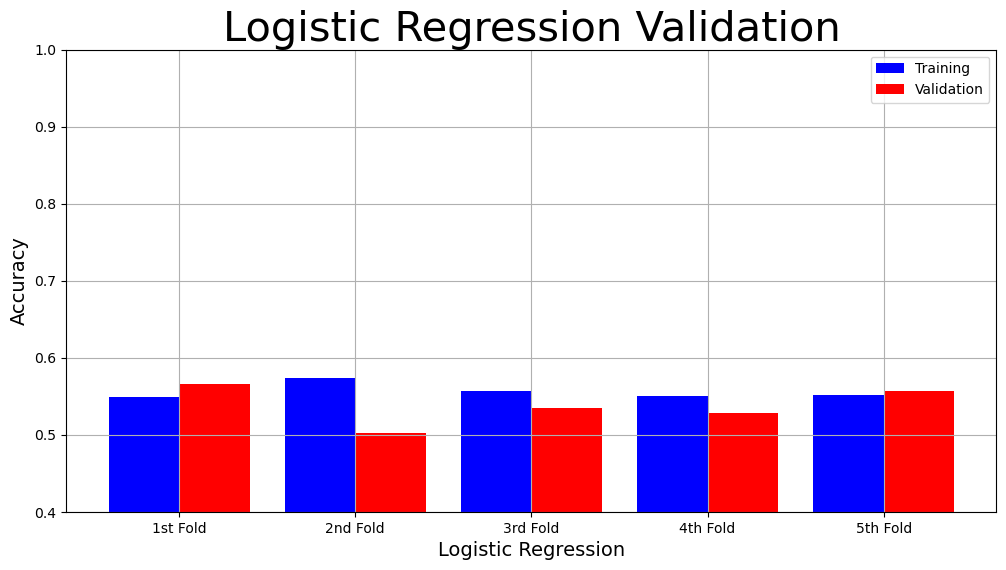

In [32]:
model_eval.plot_result(result,x_label='Logistic Regression',plot_title="Logistic Regression Validation",image_name="",_type='accuracy')
